In [5]:
#Importieren der benötigten Packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2
%matplotlib inline

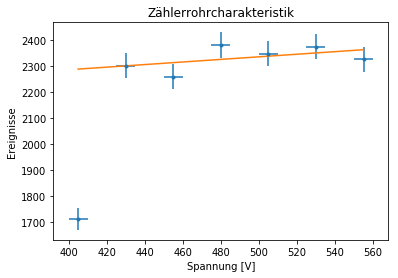

In [10]:
#Zählerrohrspannung
U=np.array([405, 430, 455, 480, 505, 530, 555])
U_err = 5

#gezählte Ereignisse
N=np.array([1711, 2303, 2261, 2383, 2349, 2376, 2328])
err_N=np.sqrt(N)

#Fit-Funktion

def linear(x,a,b):
    return a*x+b

popt, pcov=curve_fit(linear, U[1:], N[1:])

#Plotten der Fehler
plt.errorbar(U, N, err_N, U_err, fmt=".")
plt.xlabel('Spannung [V]')
plt.ylabel('Ereignisse')
plt.title('Zählerrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\251 - Statistik des radioaktiven Zerfalls\Diagramme\Zählerrohrcharakteristik.pdf' ,format='pdf')

In [ ]:
#Importieren der Daten
anazahl, haeufigkeit=np.loadtxt('', unpack=True)
err=np.sqrt(haeufigkeit)

#Plotten der Fehler
plt.errorbar(anzahl, haeufigkeit, fehler, fmt='.')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des Radioaktivenzerfalls')

#Fitten des Gaußian
def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)exp(-(x-mu)**2/2/sig**2)

popt, pcov=curve_fit(gaussian,anzahl[:], haeufigkeit[:],p0=[,,],sigma=err[:])

#Fitten der Poisson-Verteilung
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[:]
haeufigkeit[:], p0=[:], sigma=err[:])

#Plotten der Fits
pkt.arrornar(anzahl,haeufigkeit,fehler fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [1/s]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des Radioaktivenzerfalls')
x=np.linspace(,,)
plt.plot(x, gaussian(x,*popt), label='Gauß')
plt.plot(x, poisson(x,*popt_p), label='Poisson', linestyle=':')
plt.legend()
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\Universe\Praktikum\PAP 2.2\251 - Statistik des radioaktiven Zerfalls\Diagramme\Statistik_des_radioaktive_Zeralls.pdf' ,format='pdf')


#Daten printen
print("Gaußfit:")
print("A=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ",Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("mu_p=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))

#Gauß
chi2_g=np.sum((gaussian(anzahl[:],*popt)-haufigkeit[:])**2/err[:]**2)
dof_g=len(anzahl[:])-3
chi2_red_g=chi2_g/dof_g
print("chi2_g", chi2_g)
print("chi2_red_g", chi2_red_g)

#Poisson
chi2_p=np.sum((poisson(anzahl[:],*popt)-haufigkeit[:])**2/err[:]**2)
dof_p=len(anzahl[:])-3
chi2_red_p=chi2_p/dof_p
print("chi2_p", chi2_p)
print("chi2_red_p", chi2_red_p)

#Berechnung der Fit-Wahrscheinlichkeit
#Gauß
prob_g=round(1-chi2.cdf(chi_g,dof_g),2)*100
#Poisson
prob_p=round(1-chi2.cdf(chi_p,dof_p),2)*100

print("Fitwahrscheinlichkeit Gauß:", prob_g, "%")
print("Fitwahrscheinlichkeit Poisson:", prob_p, "%")